<a href="https://colab.research.google.com/github/yahiahassan66/DEEP-LEARNING-LAB_CODE-/blob/main/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

class Perceptron:
    """Single Layer Perceptron"""

    def __init__(self, learning_rate=0.01, n_iters=100, random_state=42):
        """
        Parameters:
        learning_rate : float, step size for weight updates
        n_iters : int, maximum number of training iterations
        random_state : int, random seed for reproducibility
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors = []  # Track errors per epoch
        self.converged = False

    def initialize_weights(self, n_features):
        """Initialize weights with small random values"""
        np.random.seed(self.random_state)
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = np.random.randn() * 0.01

    def activation(self, x):
        """Step activation function"""
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        """
        Train the perceptron

        Parameters:
        X: array-like, shape (n_samples, n_features)
        y: array-like, shape (n_samples,), binary labels {0, 1}
        """
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        # Convert y to numpy array if needed
        y = np.array(y).flatten()

        for epoch in range(self.n_iters):
            epoch_errors = 0

            for idx in range(n_samples):
                # Forward pass
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Compute error
                error = y[idx] - y_pred

                # Update weights if error != 0
                if error != 0:
                    self.weights += self.lr * error * X[idx]
                    self.bias += self.lr * error
                    epoch_errors += 1

            # Record errors for this epoch
            self.errors.append(epoch_errors)

            # Check for convergence
            if epoch_errors == 0:
                print(f"Converged at epoch {epoch + 1}")
                self.converged = True
                break

        if not self.converged:
            print(f"Did not converge after {self.n_iters} iterations")

    def predict(self, X):
        """Make predictions"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    def score(self, X, y):
        """Calculate accuracy"""
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Generate synthetic data
def generate_data():
    """Create linearly separable dataset"""
    X, y = make_blobs(
        n_samples=200,
        centers=2,
        n_features=2,
        cluster_std=1.5,
        random_state=42
    )
    y = np.where(y == 0, 0, 1)  # Convert to binary labels
    return X, y

# Example usage
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=50)
perceptron.fit(X_train, y_train)

# Evaluate
train_acc = perceptron.score(X_train, y_train)
test_acc = perceptron.score(X_test, y_test)
print(f"Training accuracy: {train_acc:.2%}")
print(f"Test accuracy: {test_acc:.2%}")


Converged at epoch 1
Training accuracy: 100.00%
Test accuracy: 100.00%


Converged at epoch 1


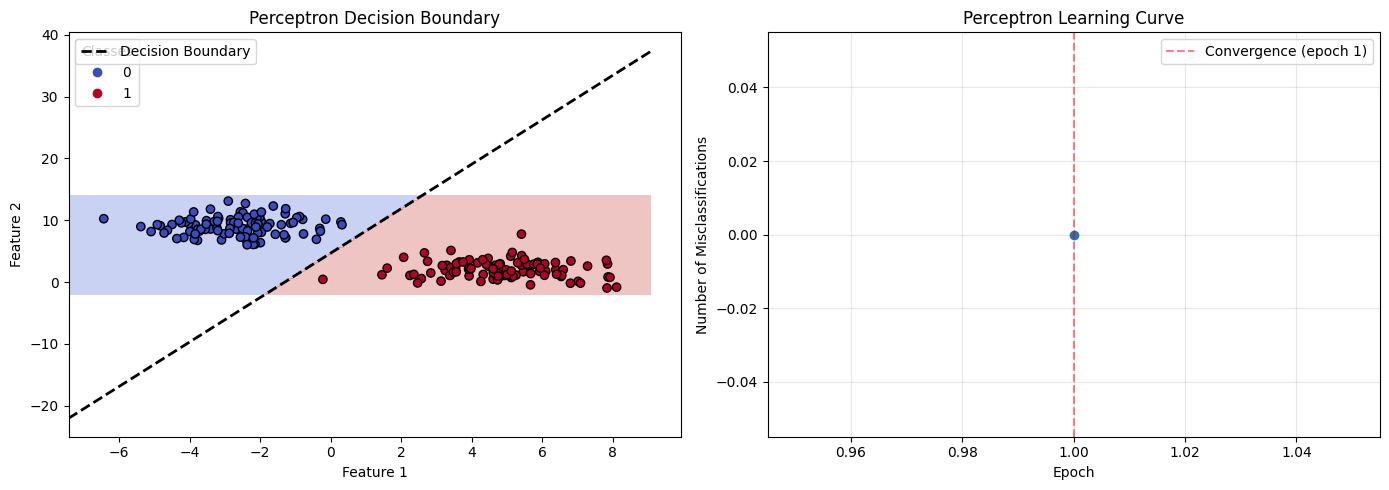

In [2]:
def plot_decision_boundary(X, y, perceptron, title="Perceptron Decision Boundary"):
    """Plot decision boundary and data points"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Decision Boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create mesh grid
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )

    # Predict for each mesh point
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and scatter
    ax1.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = ax1.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title(title)

    # Add legend
    legend1 = ax1.legend(*scatter.legend_elements(), title="Classes")
    ax1.add_artist(legend1)

    # Plot decision boundary line (for 2D)
    if perceptron.weights is not None:
        w1, w2 = perceptron.weights
        b = perceptron.bias

        # Solve for x2: x2 = (-w1*x1 - b) / w2
        x_line = np.array([x_min, x_max])
        y_line = (-w1 * x_line - b) / w2
        ax1.plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')
        ax1.legend()

    # Plot 2: Learning Curve
    ax2.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Number of Misclassifications')
    ax2.set_title('Perceptron Learning Curve')
    ax2.grid(True, alpha=0.3)

    # Highlight convergence point
    if perceptron.converged:
        conv_epoch = len(perceptron.errors)
        ax2.axvline(x=conv_epoch, color='r', linestyle='--', alpha=0.5,
                    label=f'Convergence (epoch {conv_epoch})')
        ax2.legend()

    plt.tight_layout()
    plt.show()


# Optional: Weight evolution (not implemented yet)
def plot_weight_evolution(perceptron, X_train, y_train):
    """Plot weight evolution during training (simulated)
    Note: This requires modifying the perceptron to save weight history
    """
    pass


# Example usage
X, y = generate_data()
perceptron = Perceptron(learning_rate=0.1, n_iters=30)
perceptron.fit(X, y)
plot_decision_boundary(X, y, perceptron)


Converged at epoch 1
Converged at epoch 1
Converged at epoch 1
Converged at epoch 1
Converged at epoch 1


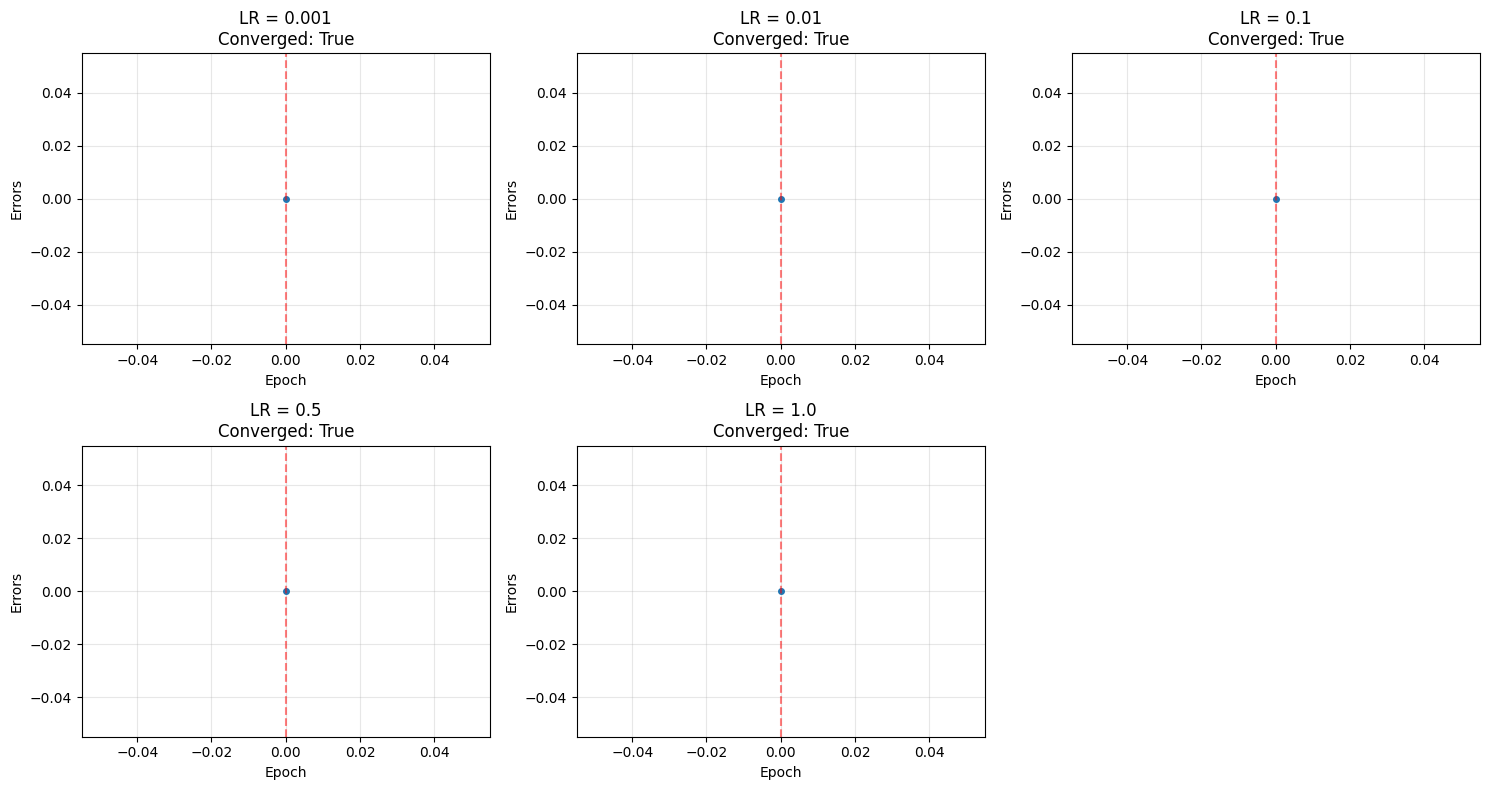

Summary of Learning Rate Experiments:
------------------------------------------------------------
Learning Rate   Converged  Epochs     Final Errors   
------------------------------------------------------------
0.001           True       1          0              
0.010           True       1          0              
0.100           True       1          0              
0.500           True       1          0              
1.000           True       1          0              


In [3]:
def experiment_learning_rates(X, y, n_epochs=200):
    """Compare different learning rates with more epochs"""

    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    results = []

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for idx, lr in enumerate(learning_rates):
        # Train perceptron with more epochs
        perceptron = Perceptron(learning_rate=lr, n_iters=n_epochs)
        perceptron.fit(X, y)

        # Record results
        results.append({
            'lr': lr,
            'final_errors': perceptron.errors[-1] if perceptron.errors else None,
            'converged': perceptron.converged,
            'epochs': len(perceptron.errors)
        })

        # Plot learning curve
        ax = axes[idx]
        ax.plot(perceptron.errors, marker='o', markersize=4)
        ax.set_title(f'LR = {lr}\nConverged: {perceptron.converged}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Errors')
        ax.grid(True, alpha=0.3)

        # Mark convergence
        if perceptron.converged:
            conv_epoch = len(perceptron.errors)
            ax.axvline(x=conv_epoch - 1, color='r', linestyle='--', alpha=0.5)

    # Hide unused subplot if any
    if len(learning_rates) < len(axes):
        for i in range(len(learning_rates), len(axes)):
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Print summary table
    print("Summary of Learning Rate Experiments:")
    print("-" * 60)
    print(f"{'Learning Rate':<15} {'Converged':<10} {'Epochs':<10} {'Final Errors':<15}")
    print("-" * 60)
    for res in results:
        print(f"{res['lr']:<15.3f} {str(res['converged']):<10} {res['epochs']:<10} {res['final_errors']:<15}")

# Run experiment with more epochs
X, y = generate_data()
experiment_learning_rates(X, y, n_epochs=200)  # زيادة عدد الـ epochs إلى 200



=== XOR Problem ===
Did not converge after 100 iterations

Predictions:
----------------------------------------
Input      True       Predicted  Correct   
----------------------------------------
[0 0]      0          1          False     
[0 1]      1          1          True      
[1 0]      1          0          False     
[1 1]      0          0          True      
----------------------------------------
All correct: False
Final errors per epoch: [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


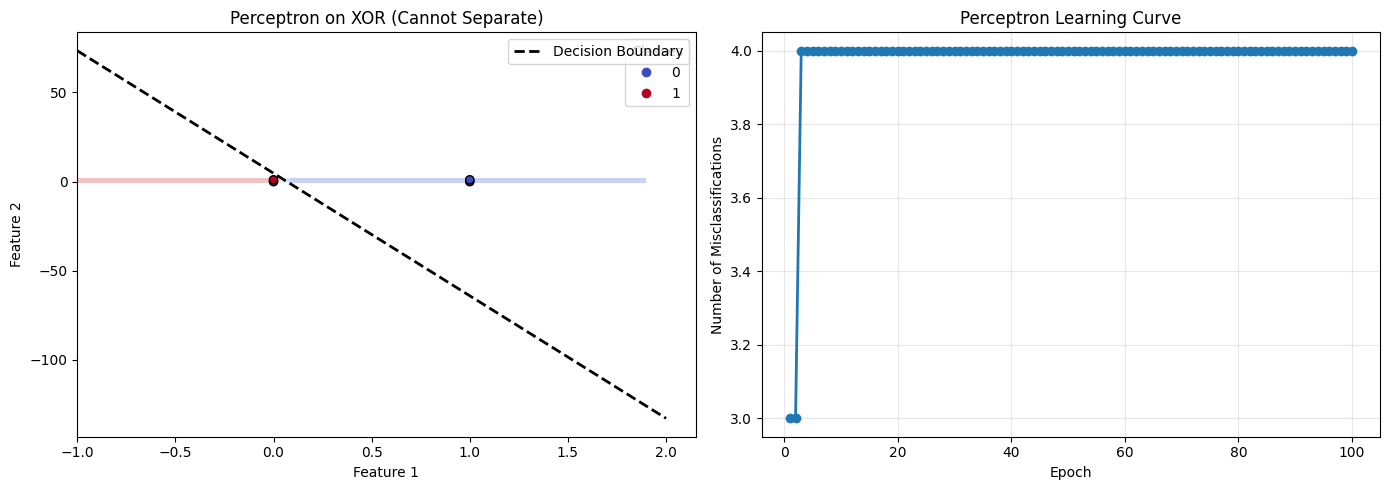


CONCLUSION: Single-layer perceptron CANNOT learn XOR!
This demonstrates the need for multi-layer networks.


In [4]:
def xor_experiment():
    """Demonstrate perceptron's failure on XOR"""

    # XOR dataset
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])

    # Try to learn XOR
    print("=== XOR Problem ===")
    perceptron = Perceptron(learning_rate=0.1, n_iters=100)
    perceptron.fit(X_xor, y_xor)

    # Show predictions
    print("\nPredictions:")
    print("-" * 40)
    print(f"{'Input':<10} {'True':<10} {'Predicted':<10} {'Correct':<10}")
    print("-" * 40)

    all_correct = True
    for x, y_true in zip(X_xor, y_xor):
        y_pred = perceptron.predict(x.reshape(1, -1))[0]
        correct = y_true == y_pred
        if not correct:
            all_correct = False
        print(f"{str(x):<10} {y_true:<10} {y_pred:<10} {str(correct):<10}")

    print("-" * 40)
    print(f"All correct: {all_correct}")
    print(f"Final errors per epoch: {perceptron.errors}")

    # Visualize (will show failure)
    plot_decision_boundary(X_xor, y_xor, perceptron, "Perceptron on XOR (Cannot Separate)")

    return all_correct


# Run XOR experiment
xor_success = xor_experiment()
if not xor_success:
    print("\n" + "=" * 60)
    print("CONCLUSION: Single-layer perceptron CANNOT learn XOR!")
    print("This demonstrates the need for multi-layer networks.")
    print("=" * 60)


In [5]:
class PocketPerceptron(Perceptron):
    """Perceptron with Pocket Algorithm"""

    def __init__(self, learning_rate=0.01, n_iters=100):
        super().__init__(learning_rate, n_iters)
        self.best_weights = None
        self.best_bias = None
        self.best_score = -np.inf  # Initialize to negative infinity

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        # Initialize best weights with initial weights
        self.best_weights = self.weights.copy()
        self.best_bias = self.bias
        self.best_score = self.score(X, y)

        for epoch in range(self.n_iters):
            epoch_errors = 0

            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self.activation(linear_output)

                error = y[idx] - y_pred
                if error != 0:
                    self.weights += self.lr * error * X[idx]
                    self.bias += self.lr * error
                    epoch_errors += 1

                # Check if current weights are better
                current_score = self.score(X, y)
                if current_score > self.best_score:
                    self.best_weights = self.weights.copy()
                    self.best_bias = self.bias
                    self.best_score = current_score

            self.errors.append(epoch_errors)

            if epoch_errors == 0:
                break

    def predict(self, X):
        """Use best weights for prediction"""
        linear_output = np.dot(X, self.best_weights) + self.best_bias
        return self.activation(linear_output)
